In [2]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np 
import glob

train_*.csv - contains traffic data. This a csv file where each row corresponds to a particular article and each column correspond to a particular date. Some entries are missing data. The page names contain the Wikipedia project (e.g. en.wikipedia.org), type of access (e.g. desktop) and type of agent (e.g. spider). In other words, each article name has the following format: 'name_project_access_agent' (e.g. 'AKB48_zh.wikipedia.org_all-access_spider').

key_*.csv - gives the mapping between the page names and the shortened Id column used for prediction

In [4]:
glob.glob('../data/*')

['../data/key_1.csv', '../data/sample_submission_1.csv', '../data/train_1.csv']

In [5]:
full_df = pd.read_csv('../data/train_1.csv')

In [6]:
full_df.shape #days between dates is 550 so right

(145063, 551)

In [12]:
pdf = pd.DataFrame()

In [13]:
pdf['Page'] = full_df.Page

In [15]:
pdf['agent'] = full_df.Page.map(lambda x: x.split('_')[-1]); pdf.head()

,Page,agent
0,2NE1_zh.wikipedia.org_all-access_spider,spider
1,2PM_zh.wikipedia.org_all-access_spider,spider
2,3C_zh.wikipedia.org_all-access_spider,spider
3,4minute_zh.wikipedia.org_all-access_spider,spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,spider


In [16]:
pdf['access'] = full_df.Page.map(lambda x: x.split('_')[-2]); pdf.head()

,Page,agent,access
0,2NE1_zh.wikipedia.org_all-access_spider,spider,all-access
1,2PM_zh.wikipedia.org_all-access_spider,spider,all-access
2,3C_zh.wikipedia.org_all-access_spider,spider,all-access
3,4minute_zh.wikipedia.org_all-access_spider,spider,all-access
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,spider,all-access


In [17]:
pdf['project'] = full_df.Page.map(lambda x: x.split('_')[-3]); pdf.head()

,Page,agent,access,project
0,2NE1_zh.wikipedia.org_all-access_spider,spider,all-access,zh.wikipedia.org
1,2PM_zh.wikipedia.org_all-access_spider,spider,all-access,zh.wikipedia.org
2,3C_zh.wikipedia.org_all-access_spider,spider,all-access,zh.wikipedia.org
3,4minute_zh.wikipedia.org_all-access_spider,spider,all-access,zh.wikipedia.org
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,spider,all-access,zh.wikipedia.org


In [23]:
pdf['site_name'] = full_df.Page.map(lambda x: '_'.join(x.split('_')[:-3])); pdf.head()

,Page,agent,access,project,site_name
0,2NE1_zh.wikipedia.org_all-access_spider,spider,all-access,zh.wikipedia.org,2NE1
1,2PM_zh.wikipedia.org_all-access_spider,spider,all-access,zh.wikipedia.org,2PM
2,3C_zh.wikipedia.org_all-access_spider,spider,all-access,zh.wikipedia.org,3C
3,4minute_zh.wikipedia.org_all-access_spider,spider,all-access,zh.wikipedia.org,4minute
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,spider,all-access,zh.wikipedia.org,52_Hz_I_Love_You


In [25]:
pdf.project.value_counts()

en.wikipedia.org         24108
ja.wikipedia.org         20431
de.wikipedia.org         18547
fr.wikipedia.org         17802
zh.wikipedia.org         17229
ru.wikipedia.org         15022
es.wikipedia.org         14069
commons.wikimedia.org    10555
www.mediawiki.org         7300
Name: project, dtype: int64

In [26]:
pdf.agent.value_counts()

all-agents    110150
spider         34913
Name: agent, dtype: int64

In [28]:
pdf.access.value_counts()

all-access    74315
mobile-web    35939
desktop       34809
Name: access, dtype: int64

In [31]:
pdf.site_name.value_counts()

Special:Search                                    35
Google                                            30
YouTube                                           29
Facebook                                          28
IPhone                                            24
Instagram                                         23
Netflix                                           22
PlayStation_4                                     22
The_Beatles                                       20
Lady_Gaga                                         20
Red_Hot_Chili_Peppers                             20
Ice_Cube                                          20
Metallica                                         20
Twenty_One_Pilots                                 20
One_Direction                                     20
WhatsApp                                          19
AC/DC                                             19
Snapchat                                          19
Donald_Trump                                  

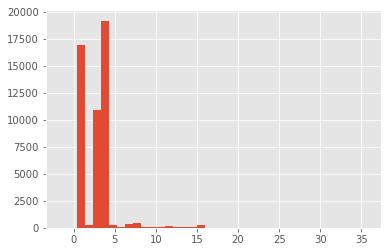

In [49]:
pdf.site_name.value_counts().hist(bins=38, range=(-1,36), align='left')

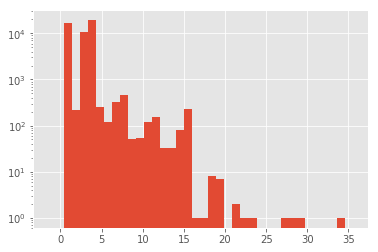

In [50]:
pdf.site_name.value_counts().hist(log=True, bins=38, range=(-1,36), align='left')